In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def plot_result(x, y, yreal=np.tan):
    plt.figure(figsize=(12,7))
    
    plt.subplot(1,2,1)    
    plt.title("Розв'язок задачі Коші")
    plt.plot(x, y, label='Обчислений')
    plt.plot(x, yreal(x), label='Істинний')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title("Модуль різниці")
    plt.plot(x, np.abs(yreal(x) - y))

$$ y' = (1-x^2)y + F(x) $$
$$ y = \tan x $$

$$ \frac{1}{\cos^2 x} = (1-x^2) \tan x + F(x) $$
$$ F(x) = \frac{1}{\cos^2 x} + (x^2 - 1) \tan x  $$

$$ y' = (1-x^2)y + \frac{1}{\cos^2 x} + (x^2 - 1) \tan x = (1-x^2) (y - \tan x) + \frac{1}{\cos^2 x} $$

In [3]:
def f(x, y):
    return 1 / np.cos(x)**2 + (1-x**2)*(y - np.tan(x))

x0 = -np.pi/3
y0 = np.tan(x0)

In [4]:
def rk4(f, x0, y0, xlast, h=0.1):
    steps = int(np.ceil((xlast - x0) / h))
    xres = np.empty(steps + 1)
    yres = np.empty(steps + 1)
    xres[0] = x0
    yres[0] = y0
    
    x = x0
    y = y0
    for i in range(1, steps + 1):
        k1 = f(x, y)
        k2 = f(x + h/2, y + h/2*k1)
        k3 = f(x + h/2, y + h/2*k2)
        k4 = f(x + h, y + h*k3)
        
        y += h/6 * (k1 + 2*k2 + 2*k3 + k4)
        x += h
        xres[i] = x
        yres[i] = y
        
    return xres, yres

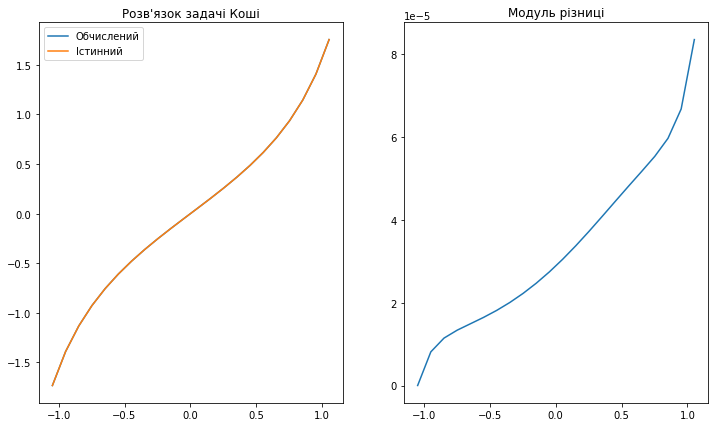

In [5]:
x_rk, y_rk = rk4(f, x0, y0, -x0, h=0.1)
plot_result(x_rk, y_rk)

In [6]:
def adams_bashforth(f, x0, y0, xlast, h=0.1): #4-step
    steps = int(np.ceil((xlast - x0[-1]) / h))
    xres = np.empty(steps + 4)
    yres = np.empty(steps + 4)
    xres[:4] = x0
    yres[:4] = y0
    
    x = x0[3]
    y = y0[3]
    
    for i in range(4, steps + 4):
        k1 = f(x, y)
        k2 = f(xres[i-2], yres[i-2])
        k3 = f(xres[i-3], yres[i-3])
        k4 = f(xres[i-4], yres[i-4])
        
        y += h/24 * (55*k1 - 59*k2 + 37*k3 - 9*k4)
        x += h
        xres[i] = x
        yres[i] = y
        
    return xres, yres

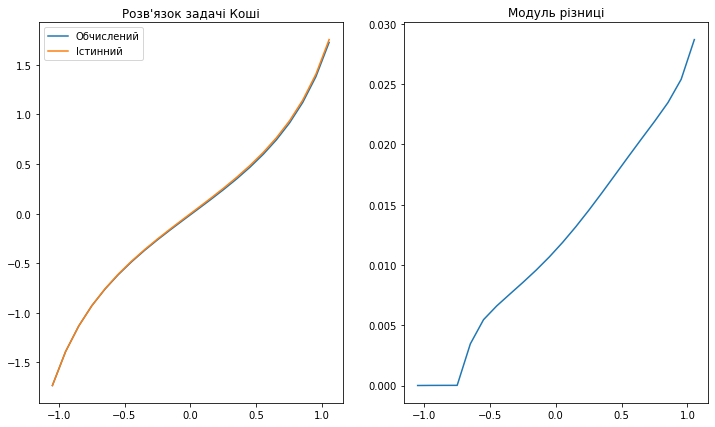

In [7]:
x_ab, y_ab = adams_bashforth(f, x_rk[:4], y_rk[:4], -x0)
plot_result(x_ab, y_ab)